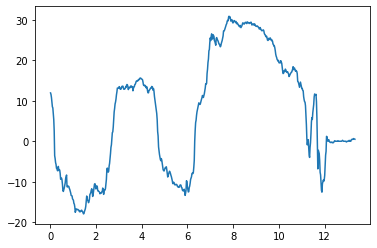

Calculou


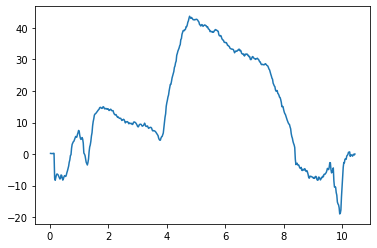

Calculou


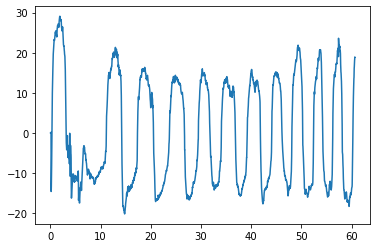

Calculou


In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[23]:


'''
Code for Python 3

'''
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 500, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()
label1 = tk.Label(root, text='Tratamento dos dados', bg = 'lightsteelblue2')
label1.config(font=('helvetica', 20))
canvas1.create_window(200, 60, window=label1)


def getTxtRDA ():

    global flowVector1
    import_file_path = filedialog.askopenfilename()
    f1 = open(import_file_path, 'r')
    contents_f1 = f1.read()

    info1_f1 = re.search('flow', contents_f1)
    info2_f1 = re.search('volume', contents_f1)
    info3_f1 = re.search('markers', contents_f1)

    flowVector1 = list()
    start = info1_f1.end()+5
    stop = info2_f1.start()-3
    measure = str()
    # for x in range(start, stop, 1):
    # 	print(x)
    for x in range(start, stop, 1):
        if contents_f1[x] == ',':
            flowVector1.append(float(measure))		
            measure = str()
        else:
            measure += str(contents_f1[x])
    flowVector1.append(float(measure))
            
    

    #PLOT
    tamanhoAmostra = len(flowVector1)
    tempo = list()
    segundo = 0.0
    for y in range(tamanhoAmostra):
        segundo = segundo + 0.02
        tempo.append(segundo)
    plt.plot(tempo, flowVector1)
    plt.show()


browseButtonTxtRDA= tk.Button(text="Importar RDA(.TXT)", command=getTxtRDA, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(200, 130, window=browseButtonTxtRDA)


def convertToTxtRDA ():
    dataCounter = 0
    sampleInterval = 0 #numero de amostras vista em cada passo

    flagPos = True # Positive Number
    flagNeg = False
    global posSequences
    global negSequences
    posSequences = list() #lista de listas
    negSequences = list()

    #SEPARA INSPIRAÇÃO DE EXPIRAÇÃO
    while (dataCounter<len(flowVector1)):
        
        posCounter = 0
        negCounter = 0
        
        for x in range(dataCounter,dataCounter+sampleInterval):
        
            if flowVector1[x] >= 0.0:
                posCounter += 1
            elif flowVector1[x] < 0.0:
                negCounter += 1

        if flagPos and posCounter < sampleInterval:
            dataCounter += 1
        elif flagPos and posCounter == sampleInterval:
            flagPos = False
            flagNeg = True
            posSequences.append([])		
            while (flowVector1[dataCounter] >= 0.0):
                posSequences[-1].append(flowVector1[dataCounter]) 
                dataCounter += 1
                if dataCounter == len(flowVector1):
                    break
        elif flagNeg and negCounter < sampleInterval:
            dataCounter += 1
        elif flagNeg and negCounter == sampleInterval:
            flagPos = True
            flagNeg = False
            negSequences.append([])		
            while (flowVector1[dataCounter] < 0.0):
                negSequences[-1].append(flowVector1[dataCounter]) 
                dataCounter += 1
                if dataCounter == len(flowVector1):
                    break
    
    #VALIDA A SEQUENCIA POSITIVA
    for x in posSequences:
        dataIndex = 0	
        flagNotUpdt = False
        if x[0] == 0.0:
            flagZero = True
        else:
            flagZero = False
            flagNotUpdt = True
        while (flagZero):
            dataIndex += 1
            if dataIndex == len(x):
                break
            # print(dataIndex)
            if x[dataIndex] == 0.0:
                flagZero = True
            else:
                flagZero = False
        if flagNotUpdt:
            continue
        elif dataIndex == len(x):
            posSequences[posSequences.index(x)] = 'empty'
        else:
            tempList = list()
            for index in range(dataIndex,len(x)):
                tempList.append(x[index])
            posSequences[posSequences.index(x)] = tempList

    #VALIDA A SEQUENCIA NEGATIVA
    for x in negSequences:
        dataIndex = 0	
        flagNotUpdt = False
        if x[0] == 0.0:
            flagZero = True
        else:
            flagZero = False
            flagNotUpdt = True
        while (flagZero):
            dataIndex += 1
            if dataIndex == len(x):
                break
            # print(dataIndex)
            if x[dataIndex] == 0.0:
                flagZero = True
            else:
                flagZero = False
        if flagNotUpdt:
            continue
        elif dataIndex == len(x):
            negSequences[negSequences.index(x)] = 'empty'
        else:
            tempList = list()
            for index in range(dataIndex,len(x)):
                tempList.append(x[index])
            negSequences[negSequences.index(x)] = tempList	
    
    #TEMPO INSPIRATORIO MEDIO
    tempoIns = 0.0
    for x in negSequences:
         tempoIns = tempoIns + (len(x)*0.02)
    tempoIns = tempoIns/ len(negSequences)

    #TEMPO EXPIRATORIO MEDIO
    tempoExp = 0.0
    for x in posSequences:
         tempoExp = tempoExp + (len(x)*0.02)
    tempoExp = tempoExp/ len(posSequences)

    #FREQUENCIA MEDIA
    frequencia = len(posSequences)/(len(flowVector1)*0.02)
    frequencia = frequencia * 60

    #calcula I:E
    valoresPositivos= list()
    valoresNegativos= list()
    somaPositivos = 0
    somaNegativos = 0
    
    for x in flowVector1:
        if x>0:
            valoresPositivos.append(x)
            somaPositivos += x
        elif x<0:
            valoresNegativos.append(x)
            somaNegativos += x
       
    global fluxoPositivoMedio
    global fluxoNegativoMedio
    global ie 
    fluxoPositivoMedio = somaPositivos/len(valoresPositivos) #Fluxo Expiratório Médio
    fluxoNegativoMedio = somaNegativos/len(valoresNegativos) #Fluxo Inspiratório Médio
    ie = len(valoresNegativos)/len(valoresPositivos)         #I:E
    
    #COLOCA OS DADOS NO LAYOUT
    textoFPM= tk.Label(text="Fluxo inspiratorio medio: "+ str(fluxoPositivoMedio) , bg='green', fg='white', font=('helvetica', 12, 'bold'))
    textoFNM= tk.Label(text="Fluxo Expiratório Médio: "+ str(fluxoNegativoMedio) , bg='green', fg='white', font=('helvetica', 12, 'bold'))
    textoIE= tk.Label(text="I:E : "+ str(ie) , bg='green', fg='white', font=('helvetica', 12, 'bold'))
    textoTIns= tk.Label(text="Tempo inspiratorio medio : "+ str(tempoIns) , bg='green', fg='white', font=('helvetica', 12, 'bold'))
    textoTExp= tk.Label(text="Tempo expiratorio medio : "+ str(tempoExp) , bg='green', fg='white', font=('helvetica', 12, 'bold'))
    textoF= tk.Label(text="Frequencia media : "+ str(frequencia) , bg='green', fg='white', font=('helvetica', 12, 'bold'))
    canvas1.create_window(200, 370, window=textoFPM)
    canvas1.create_window(200, 390, window=textoFNM)
    canvas1.create_window(200, 410, window=textoIE)
    canvas1.create_window(200, 430, window=textoTIns)
    canvas1.create_window(200, 450, window=textoTExp)
    canvas1.create_window(200, 470, window=textoF)
    canvas1.pack()
        #obs: Ele esta colocando um por cima do outro, não sei resolver

    print("Calculou")
    #SALVA A SEQUENCIA EM UM ARQUIVO
    # for x in reversed(posSequences):
    #     if x == 'empty':
    #         del posSequences[posSequences.index(x)]
    # export_file_path = filedialog.asksaveasfilename(defaultextension='.txt')
    # #read_file.to_csv (export_file_path, index = None)
    # with open(export_file_path,'a') as arquivo:
    #         arquivo.write(str(posSequences))


saveAsButtonRDA = tk.Button(text='Calcular', command=convertToTxtRDA, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(200, 180, window=saveAsButtonRDA)

def exitApplication():
    MsgBox = tk.messagebox.askquestion ('Exit Application','Tem certeza que deseja sair?',icon = 'warning')
    if MsgBox == 'yes':
       root.destroy()
     
exitButton = tk.Button (root, text='  Encerrar  ',command=exitApplication, bg='brown', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(200, 230, window=exitButton)

root.mainloop()

